
**Data Source:**

* [The Metropolitan Museum of Art Open Access](https://media.githubusercontent.com/media/metmuseum/openaccess/master/MetObjects.csv)

**Breif Description:**

The Metropolitan Museum of Art provides select datasets of information on more than 420,000 artworks in its Collection for unrestricted commercial and noncommercial use. To the extent possible under law, The Metropolitan Museum of Art has waived all copyright and related or neighboring rights to this dataset using Creative Commons Zero. This work is published from: The United States Of America. You can also find the text of the CC Zero deed in the file LICENSE in this repository. These select datasets are now available for use in any media without permission or fee; they also include identifying data for artworks under copyright. The datasets support the search, use, and interaction with the Museum’s collection.


In [ ]:
#import pacakages and libs:

import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv("MetObjects.csv")
print("FIRST 2 ROWS OF DATAFRAME:\n")
df.head(2)

FIRST 2 ROWS OF DATAFRAME:



,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Period,Dynasty,...,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository,Tags
0,1979.486.1,False,False,1,American Decorative Arts,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN
1,1980.264.5,False,False,2,American Decorative Arts,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN


In [ ]:
# Loading and having first look into data using pandas dataframe
# These methods and attribute are helpful to explore the dataset

print("ALL COLUMNS OF DATAFRAME:\n")
print(df.columns)
print(100 * '*')
print("SHAPE OF DATAFRAME:\n")
print(df.shape)
print(100 * '*')
print("DATA TYPES OF ALL COLUMN's DATAFRAME:\n")
print(df.dtypes)
print(100 * '*')
print("STATISTIC INFO OF ALL COLUMN's DATAFRAME:\n:")
print(df.info())
print(100 * '*')
print("SUMMARY STATISTIC's OF DATAFRAME:\n")
print(df.describe())

ALL COLUMNS OF DATAFRAME:

Index(['Object Number', 'Is Highlight', 'Is Public Domain', 'Object ID',
       'Department', 'Object Name', 'Title', 'Culture', 'Period', 'Dynasty',
       'Reign', 'Portfolio', 'Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date', 'Object Date', 'Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Credit Line',
       'Geography Type', 'City', 'State', 'County', 'Country', 'Region',
       'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification',
       'Rights and Reproduction', 'Link Resource', 'Metadata Date',
       'Repository', 'Tags'],
      dtype='object')
****************************************************************************************************
SHAPE OF DATAFRAME:

(495103, 44)
***************************************************************************************

## Cleaning dataset : Dropping Columns

In [ ]:
#we need to find out the columns in dataset, who are not worth to include in analysis:
#here we are going to drop column who has high numbers of NaN/Missing valules:

percentage = (df.isnull().sum()/len(df)) * 100
percentage.sort_values()
percentage

#here we could see that there are many columns which has more than 80% of missing values.
#This makes us to think and decide should we keep or drop
#decided to drop them, since they are cant add values due to huge no of missing observation:

#included 'Object Number' since this column is not requied too, since object ID is already there.
#And without clear documentation about its data variable this is not helpful

drop_list = ['Object Number', 'Period', 'Dynasty', 'Reign', 'Portfolio', 'Artist Prefix', 'Artist Suffix', 'Geography Type', 'City', 'State', 'County', 'Country', 'Region', 'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Rights and Reproduction']
df.drop(drop_list, axis=1, inplace=True)

#verify that the drop_list is no more shows up in datframe: shape and columns:
print(df.shape)
print(df.columns)
print()

#check the final list of columns and their missing percentage values:
print('Columns and their missing values - in percenages\n')
percentage = (df.isnull().sum()/len(df)) * 100
percentage.sort_values()
percentage

#This looks good to work further with these columns!

(495103, 25)
Index(['Is Highlight', 'Is Public Domain', 'Object ID', 'Department',
       'Object Name', 'Title', 'Culture', 'Artist Role', 'Artist Display Name',
       'Artist Display Bio', 'Artist Alpha Sort', 'Artist Nationality',
       'Artist Begin Date', 'Artist End Date', 'Object Date',
       'Object Begin Date', 'Object End Date', 'Medium', 'Dimensions',
       'Credit Line', 'Classification', 'Link Resource', 'Metadata Date',
       'Repository', 'Tags'],
      dtype='object')

Columns and their missing values - in percenages



Is Highlight            0.000000
Is Public Domain        0.000000
Object ID               0.000000
Department              0.000000
Object Name             0.890522
Title                   6.314646
Culture                57.771817
Artist Role            42.259893
Artist Display Name    41.836345
Artist Display Bio     51.860926
Artist Alpha Sort      41.843414
Artist Nationality     60.935199
Artist Begin Date      51.312555
Artist End Date        51.883951
Object Date             3.036944
Object Begin Date       0.000000
Object End Date         0.000000
Medium                  1.534428
Dimensions             15.411945
Credit Line             0.159563
Classification         11.396215
Link Resource           0.000000
Metadata Date           0.000000
Repository              0.000000
Tags                   46.437812
dtype: float64

## Cleaning dataset : Correct Column Names

In [ ]:
#It is good approach to keep readable and relavent columns names:
#We need to make sure that dataset columns has the correct syntax

#This columns looks boolean style name: instead showing in name, we can change its dtype
df.rename(columns = {'Is Highlight': 'Highlight'}, inplace=True)

#This columns also looks boolean style name: instead showing in name, we can change its dtype
df.rename(columns = {'Is Public Domain': 'Public Domain'}, inplace=True)

#verify the changed names in column list:
df.columns


Index(['Highlight', 'Public Domain', 'Object ID', 'Department', 'Object Name',
       'Title', 'Culture', 'Artist Role', 'Artist Display Name',
       'Artist Display Bio', 'Artist Alpha Sort', 'Artist Nationality',
       'Artist Begin Date', 'Artist End Date', 'Object Date',
       'Object Begin Date', 'Object End Date', 'Medium', 'Dimensions',
       'Credit Line', 'Classification', 'Link Resource', 'Metadata Date',
       'Repository', 'Tags'],
      dtype='object')

## Cleaning dataset :  Dataframe Data Types

In [ ]:
#Lets change the data types of columns who alreddy having bool data variables:

df['Highlight'] = df['Highlight'].astype(bool)
df['Public Domain'] = df['Public Domain'].astype(bool)

#verify data types of 'Highlght' and 'Public Domain' columns:
print(df['Highlight'].dtypes)
print(df['Public Domain'].dtypes)

bool
bool


## Cleaning dataset : Handling NaN Values

In [ ]:
#lets handle the missing valunes in our data set in every column:
#We can either drop the row OR decide if we can keep them OR fill with 'Zero'

#check for 'NaN' for all columns:
df.isna().sum()

#looks there are many columns having NaN values!

Highlight                   0
Public Domain               0
Object ID                   0
Department                  0
Object Name              4409
Title                   31264
Culture                286030
Artist Role            209230
Artist Display Name    207133
Artist Display Bio     256765
Artist Alpha Sort      207168
Artist Nationality     301692
Artist Begin Date      254050
Artist End Date        256879
Object Date             15036
Object Begin Date           0
Object End Date             0
Medium                   7597
Dimensions              76305
Credit Line               790
Classification          56423
Link Resource               0
Metadata Date               0
Repository                  0
Tags                   229915
dtype: int64

In [ ]:
#Lets check in percentage:

percentage = (df.isnull().sum()/len(df)) * 100
percentage.sort_values()
percentage

Highlight               0.000000
Public Domain           0.000000
Object ID               0.000000
Department              0.000000
Object Name             0.890522
Title                   6.314646
Culture                57.771817
Artist Role            42.259893
Artist Display Name    41.836345
Artist Display Bio     51.860926
Artist Alpha Sort      41.843414
Artist Nationality     60.935199
Artist Begin Date      51.312555
Artist End Date        51.883951
Object Date             3.036944
Object Begin Date       0.000000
Object End Date         0.000000
Medium                  1.534428
Dimensions             15.411945
Credit Line             0.159563
Classification         11.396215
Link Resource           0.000000
Metadata Date           0.000000
Repository              0.000000
Tags                   46.437812
dtype: float64

In [ ]:
#Since This is facts about art, and there is no we can inter or extrapolate that data.
#We should drop the 'NaN' else it will create many 'not-so-useful' observation in each rows!

#We can certainly add 'Zero' or fflill() or bbfill() 
#but this is not suitable for this data set, since its all fact data about the Arts.
#And also many missing comoumns are string object type, so filling it to 'Zero' wont make any difference than NaN.

df.dropna(how='any', inplace=True)
print(df.isna().sum())


Highlight              0
Public Domain          0
Object ID              0
Department             0
Object Name            0
Title                  0
Culture                0
Artist Role            0
Artist Display Name    0
Artist Display Bio     0
Artist Alpha Sort      0
Artist Nationality     0
Artist Begin Date      0
Artist End Date        0
Object Date            0
Object Begin Date      0
Object End Date        0
Medium                 0
Dimensions             0
Credit Line            0
Classification         0
Link Resource          0
Metadata Date          0
Repository             0
Tags                   0
dtype: int64


## Cleaning dataset :  Categorical Data Variables

In [ ]:
#Lets get the columns who are categorical type:

df.describe(include=['object'])

#Here we can clearly see that thare are many categorical columns and top variable with frequency:

,Department,Object Name,Title,Culture,Artist Role,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Medium,Dimensions,Credit Line,Classification,Link Resource,Metadata Date,Repository,Tags
count,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421
unique,10,1392,9609,537,469,3741,3569,3743,294,1777,1828,3521,3094,9616,3082,249,13421,1,1,5905
top,European Sculpture and Decorative Arts,Drawing,Vase,American,Artist,John Singer Sargent,"American, Florence 1856–1925 London","Sargent, John Singer",American,1856,9999,19th century,Hard-paste porcelain,9 x 11 1/2 in. (22.9 x 29.2 cm),"Gift of Mrs. Francis Ormond, 1950",Drawings,http://www.metmuseum.org/art/collection/search...,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",Flowers
freq,5125,1632,197,4596,7140,605,605,605,3895,628,681,199,1085,165,584,2062,1,13421,13421,450


In [ ]:
#now by seeing above we have list of columns who are having categrories:
#looking into numbers its have many categories except 'Department'!

df[['Department', 'Object Name', 'Title', 'Culture', 'Artist Role', 'Artist Display Name', 'Artist Display Bio', 'Artist Alpha Sort', 'Artist Nationality', 'Medium', 'Dimensions', 'Credit Line', 'Classification', 'Tags', 'Artist Begin Date', 'Artist End Date']].describe(include='object')

,Department,Object Name,Title,Culture,Artist Role,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Medium,Dimensions,Credit Line,Classification,Tags,Artist Begin Date,Artist End Date
count,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421
unique,10,1392,9609,537,469,3741,3569,3743,294,3094,9616,3082,249,5905,1777,1828
top,European Sculpture and Decorative Arts,Drawing,Vase,American,Artist,John Singer Sargent,"American, Florence 1856–1925 London","Sargent, John Singer",American,Hard-paste porcelain,9 x 11 1/2 in. (22.9 x 29.2 cm),"Gift of Mrs. Francis Ormond, 1950",Drawings,Flowers,1856,9999
freq,5125,1632,197,4596,7140,605,605,605,3895,1085,165,584,2062,450,628,681


## Cleaning Data : Cleaning Data Variables 

In [ ]:
#Lets remove Chinese character from column:

def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i)<128)

df['Title'] = df['Title'].apply(remove_non_ascii)
df['Title'] = df.Title.str.replace("[|)({':]?/", "")
df['Title'] = df.Title.str.rstrip()
df['Title'] = df.Title.str.lstrip()


In [ ]:
#Lets clean 'Artist Role' column:
#Keeping the first role in the data set, and removed secondary roles!

df['Artist Role'] = df['Artist Role'].apply(lambda x: x.split('|')[0])  


In [ ]:
#Lets clean 'Artist Display Name' column:
#Keeping the first name and removed any other secondary names!

df['Artist Display Name'] = df['Artist Display Name'].apply(lambda x: x.split('|')[0])  


In [ ]:
#Lets clean 'Medium' column:
#removed all \r, \n characters from dataset!

df['Medium'] = df.Medium.str.rstrip()
df['Medium'] = df.Medium.str.lstrip()


In [ ]:
#Lets clean 'Dimensions' column:
#Keeping only inches dimenstion and removed all below strings from dataset!
import re 

df['Dimensions'] = df['Dimensions'].apply(lambda x: x.split('in.')[0])

re_express = re.compile('[a-wA-W)(:.]')
df['Dimensions'] = df['Dimensions'].str.replace(re_express, '')

df['Dimensions'] = df.Dimensions.str.rstrip()
df['Dimensions'] = df.Dimensions.str.lstrip()

#Re-name the column for for unit as inches:

df.rename(columns ={'Dimensions': 'Dimensions(Inch.)'}, inplace =True)



In [ ]:
#Lets clean 'Credit Line' column:
#keeping the strings and removed any dates, integers!

df['Credit Line'] = df['Credit Line'].str.rstrip()
df['Credit Line'] = df['Credit Line'].str.lstrip()
df['Credit Line'] = df['Credit Line'].apply(lambda x: x.split(',')[0]) 


In [ ]:
#Lets clean 'Tags' column:
#Removing all but keeping only one!

df['Tags'] = df['Tags'].apply(lambda x: x.split('|')[0]) 


In [ ]:
#Lets clean 'Artist Begin Date' column:
df['Artist Begin Date'] = df['Artist Begin Date'].str.rstrip()
df['Artist Begin Date'] = df['Artist Begin Date'].str.lstrip()
df['Artist Begin Date'] = df['Artist Begin Date'].apply(lambda x: x.split(' ')[0]) 
df['Artist Begin Date'] = df['Artist Begin Date'].apply(lambda x: x.split('-')[0]) 


In [ ]:
#Lets clean 'Artist End Date' column:

#cleaned multiple values, keeping the date only!
df['Artist End Date'] = df['Artist End Date'].str.rstrip()
df['Artist End Date'] = df['Artist End Date'].str.lstrip()
df['Artist End Date'] = df['Artist End Date'].apply(lambda x: x.split(' ')[0])
df['Artist End Date'] = df['Artist End Date'].apply(lambda x: x.split('-')[0])


## Cleaning Data : Re-indexing dataframe

In [ ]:
#Lets Reindex Dataframe for the clarity:
df = df.reset_index(drop=True)
df.head()


,Highlight,Public Domain,Object ID,Department,Object Name,Title,Culture,Artist Role,Artist Display Name,Artist Display Bio,...,Object Begin Date,Object End Date,Medium,Dimensions(Inch.),Credit Line,Classification,Link Resource,Metadata Date,Repository,Tags
0,False,False,33,American Decorative Arts,Bust,Bust of Abraham Lincoln,American,Maker,James Gillinder and Sons,"American, 1861–ca. 1930",...,1876,1876,Pressed glass,2 3/4 x 3 1/2 x 2 3/4,Gift of Teunis G. B. Cortelyou,Glass,http://www.metmuseum.org/art/collection/search/33,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",Sculpture
1,False,True,37,American Decorative Arts,Figure,Figure of Admiral George Rodney,British (American market),Maker,Pierre Stephan,"French, active ca. 1770–95",...,1782,1785,"Earthenware, basalt",12,Harris Brisbane Dick Fund,Ceramics,http://www.metmuseum.org/art/collection/search/37,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",Cannons
2,False,True,38,American Decorative Arts,Figure,Figure of Admiral Samuel Hood,British (American market),Maker,Pierre Stephan,"French, active ca. 1770–95",...,1782,1785,"Earthenware, basalt",12 3/8,Harris Brisbane Dick Fund,Ceramics,http://www.metmuseum.org/art/collection/search/38,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",Cannons
3,False,True,108,American Decorative Arts,Andiron,Andiron,American,Maker,John Bailey,"American, active New York, 1736–1815",...,1792,1814,Brass and iron,16 1/8 x 10 x 14 7/8,Purchase,Metal,http://www.metmuseum.org/art/collection/search...,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",Utilitarian Objects
4,False,True,109,American Decorative Arts,Andiron,Andiron,American,Maker,John Bailey,"American, active New York, 1736–1815",...,1792,1814,Brass and iron,16 1/8 x 10 x 14 7/8,Purchase,Metal,http://www.metmuseum.org/art/collection/search...,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",Utilitarian Objects


## Exploratory Data Analysis(EDA): Visualization

In [ ]:
#Lets get the top 10 category items from the dataset and plot:
#This will show the categorical distribution on non-numeric values

df.describe(include=['object'])

,Department,Object Name,Title,Culture,Artist Role,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Medium,Dimensions(Inch.),Credit Line,Classification,Link Resource,Metadata Date,Repository,Tags
count,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421
unique,10,1392,9441,537,44,2852,3569,3743,294,589,639,3521,3064,7714,1503,249,13421,1,1,591
top,European Sculpture and Decorative Arts,Drawing,Vase,American,Artist,Meissen Manufactory,"American, Florence 1856–1925 London","Sargent, John Singer",American,1710,9999,19th century,Hard-paste porcelain,9 x 11 1/2,Purchase,Drawings,http://www.metmuseum.org/art/collection/search...,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",Men
freq,5125,1632,197,4596,7785,661,605,605,3895,680,1423,199,1085,167,1621,2062,1,13421,13421,1935


In [ ]:
# here we could see that end date is '9999' which is not correct data, will drop that
df.drop(df.index[df['Artist End Date'] == '9999'], inplace = True)
df.describe(include=['object'])


,Department,Object Name,Title,Culture,Artist Role,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Medium,Dimensions(Inch.),Credit Line,Classification,Link Resource,Metadata Date,Repository,Tags
count,11998,11998,11998,11998,11998,11998,11998,11998,11998,11998,11998,11998,11998,11998,11998,11998,11998,11998,11998,11998
unique,10,1309,8997,505,43,2809,3325,3471,287,586,638,3383,2979,7303,1459,245,11998,1,1,586
top,American Decorative Arts,Drawing,Vase,American,Artist,John Singer Sargent,"American, Florence 1856–1925 London","Sargent, John Singer",American,1856,1925,1810–20,Polychrome woodblock print; ink and color on p...,9 x 11 1/2,Purchase,Drawings,http://www.metmuseum.org/art/collection/search...,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",Men
freq,4559,1632,188,4542,7776,628,605,605,3836,662,644,177,1019,167,1587,2062,1,11998,11998,1800


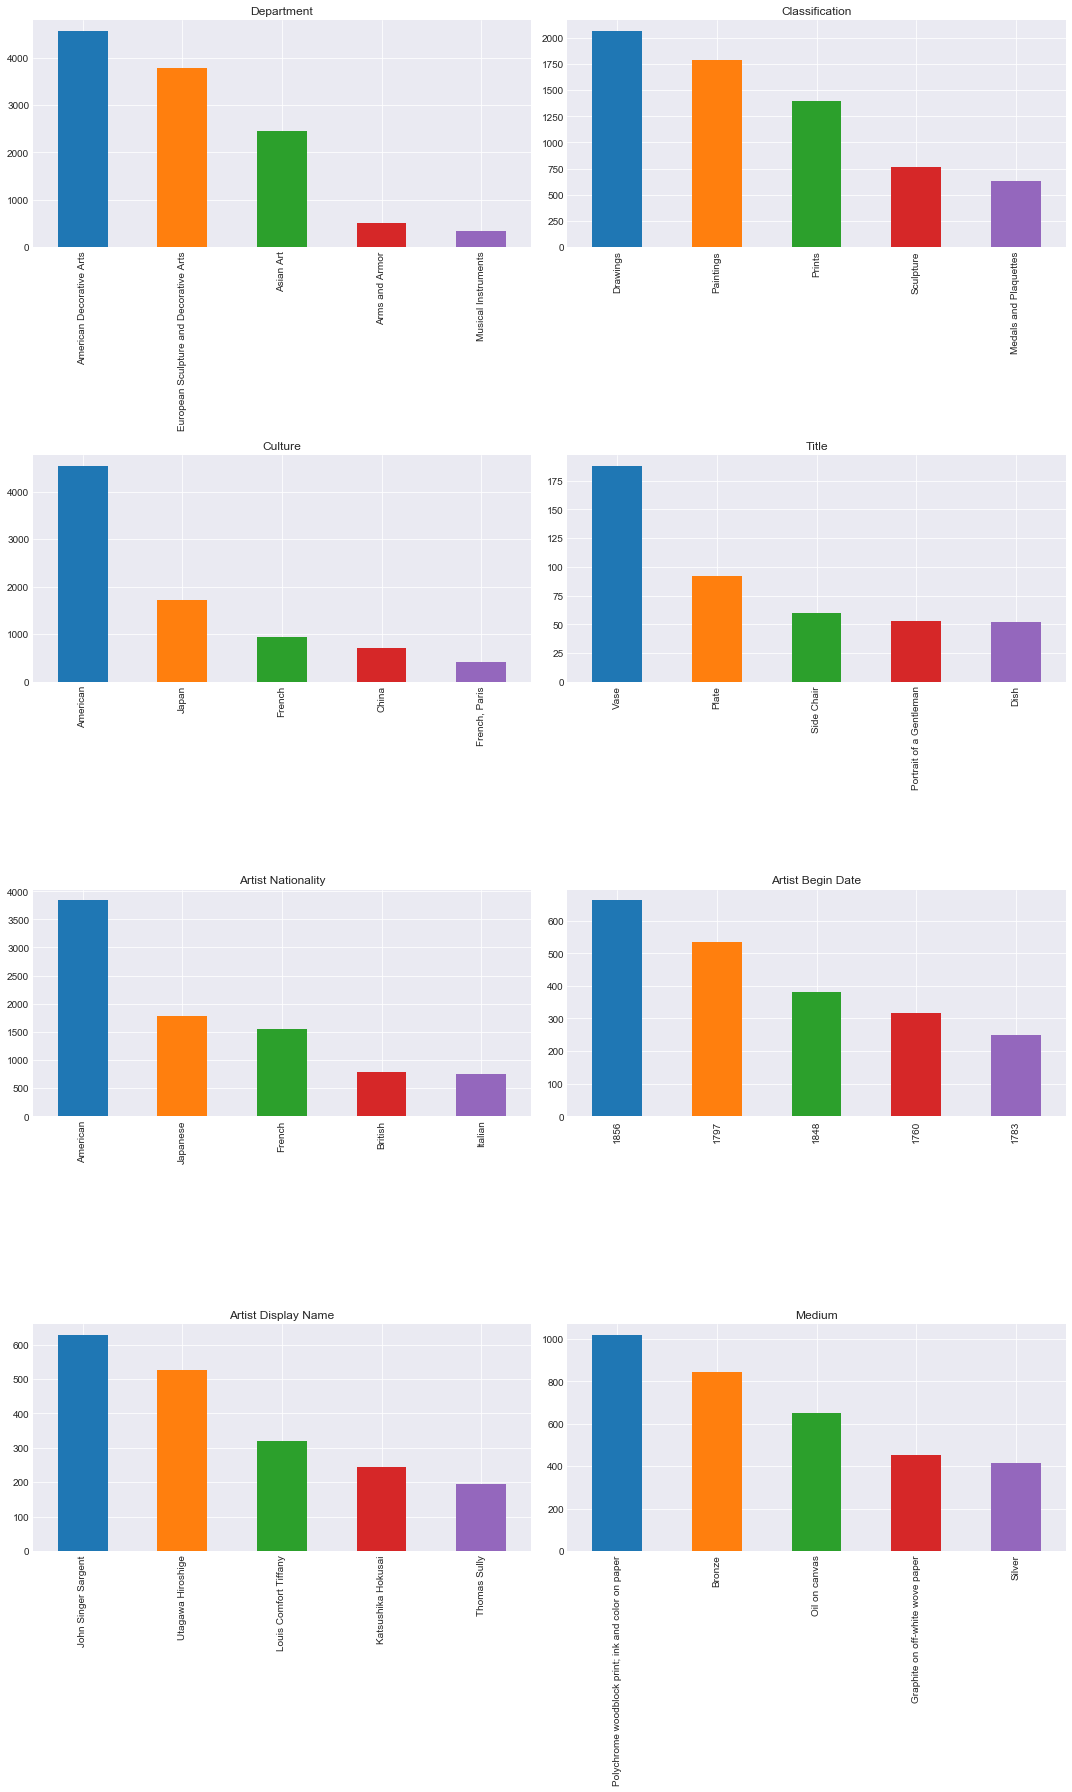

In [ ]:
#Looking at the category items, its really many in numbers!
#We will take top 5 categroy items to plot from columns:

plt.style.use('seaborn-darkgrid')
fig, axes = plt.subplots(nrows = 4, ncols=2, figsize=(15, 25))

df['Department'].value_counts()[:5].plot(kind="bar", ax=axes[0,0], title='Department')
df['Classification'].value_counts()[:5].plot(kind="bar", ax=axes[0,1], title='Classification')
df['Culture'].value_counts()[:5].plot(kind="bar", ax=axes[1,0], title='Culture')
df['Title'].value_counts()[:5].plot(kind="bar", ax=axes[1,1], title='Title')
df['Artist Nationality'].value_counts()[:5].plot(kind="bar", ax=axes[2,0], title='Artist Nationality')
df['Artist Begin Date'].value_counts()[:5].plot(kind="bar", ax=axes[2,1], title='Artist Begin Date')
df['Artist Display Name'].value_counts()[:5].plot(kind="bar", ax=axes[3,0], title='Artist Display Name')
df['Medium'].value_counts()[:5].plot(kind="bar", ax=axes[3,1], title='Medium')

plt.tight_layout()


#Lets see some of below graph and try to interprete anything interesting:

#Visualization: Dapartment
#It shows that "American Decorative Arts" are top among all!Looks artists find this most interesting to work on.


#Visualization: Classification
#It shows that "drawing" is most preffered among other way of expressing Arts in this dataset!


#Visualization: Culture
#It shows that - "American" culture is dominant in Art. And has significant influneces.

#Visualization: Artist Nationality
#here it comfirms that American origin artists are top, so it surely refelects in Culture datapoints.


#Visualization: Artist Begin Date
#Its shows that "Year-1856" has most number of artists came copared to previous year.


#Visualization: Artist Display Name
#Here Artist Name "John Single Sargent" has highest number of Arts displayed!

